# 안면 데이터 EDA

### 데이터  확인

In [2]:
from glob import glob

data_path = './data/UTKFace'

image_names = glob(data_path+"/*.jpg")
image_names[:5]

['./data/UTKFace\\100_0_0_20170112213500903.jpg.chip.jpg',
 './data/UTKFace\\100_0_0_20170112215240346.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170110183726390.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170112213001988.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170112213303693.jpg.chip.jpg']

In [3]:
def get_img(idx):
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt
    
    img = Image.open(image_names[idx])
    img = np.array(img)
    print(img.shape)

    # [age]_[gender]_[race]_[date&time].jpg
    labels = image_names[idx].split("\\")[1].split(".")[0]
    labels = labels.split("_")
    # print(labels)
    age = int(labels[0])
    gender = int(labels[1])
    race = int(labels[2])

    class_gender = ['male','female']
    class_race = ['White','Black', 'Asian', 'Indian','Others']

    print("age : ",age)
    print("gender : ",class_gender[gender])
    print("rece : ",class_race[race])
    plt.imshow(img)

(200, 200, 3)
age :  34
gender :  female
rece :  Black


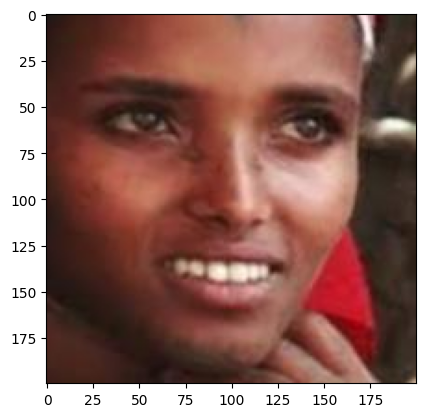

In [4]:
get_img(12730)

In [5]:
def get_imgs():
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt


    rand_idx = np.random.randint(0,5000,5)
    
    plt.figure(figsize=(30,30))
    for i,idx in enumerate(rand_idx):

        img = Image.open(image_names[idx])
        img = np.array(img)

        # [age]_[gender]_[race]_[date&time].jpg
        labels = image_names[idx].split("\\")[1].split(".")[0]
        labels = labels.split("_")
        # print(labels)
        age = int(labels[0])
        gender = int(labels[1])
        race = int(labels[2])

        class_gender = ['male','female']
        class_race = ['White','Black', 'Asian', 'Indian','Others']

        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.title(str(age)+","+ str(class_gender[gender])+ ", " + str(class_race[race]),fontsize=30)

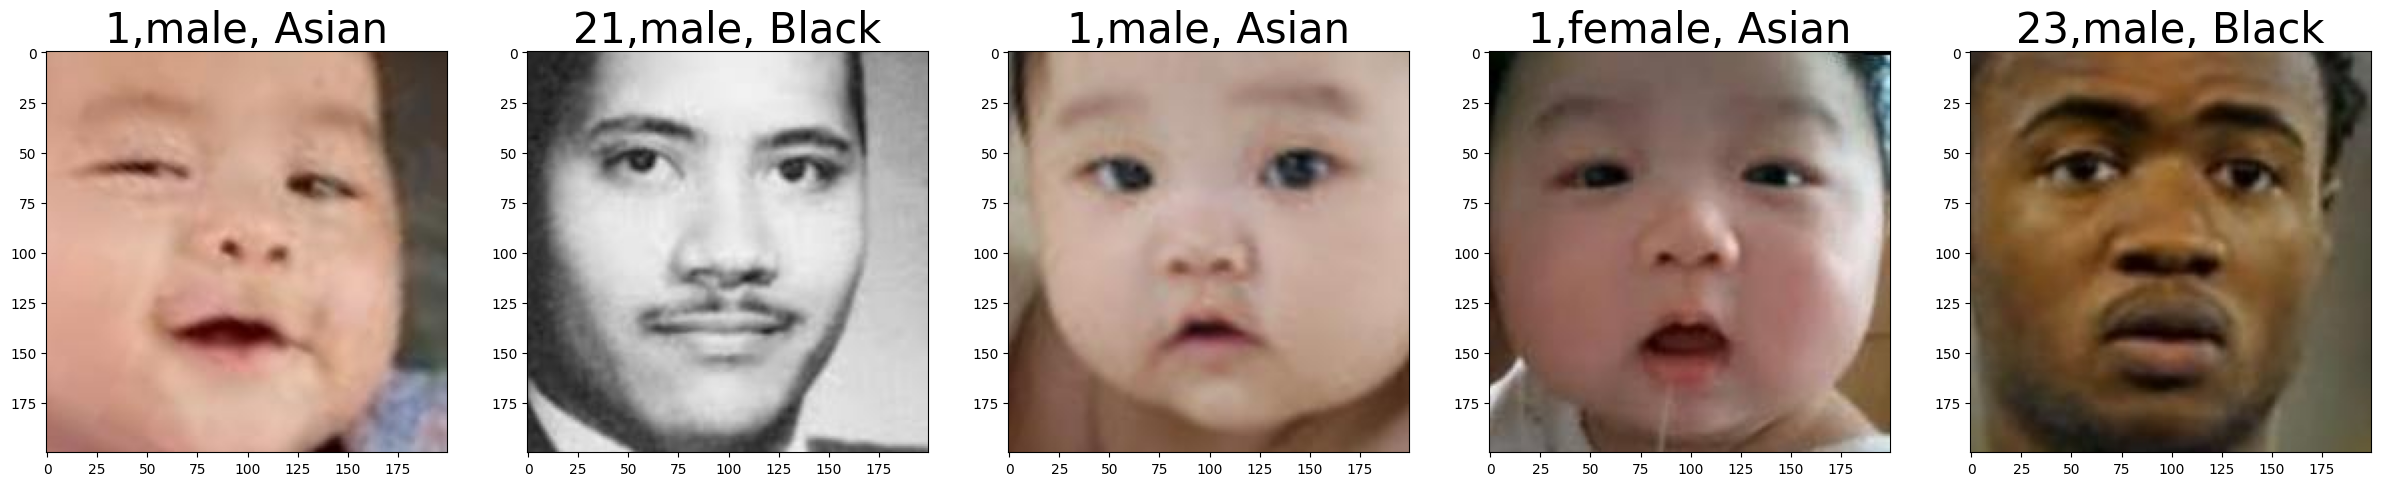

In [6]:
get_imgs()

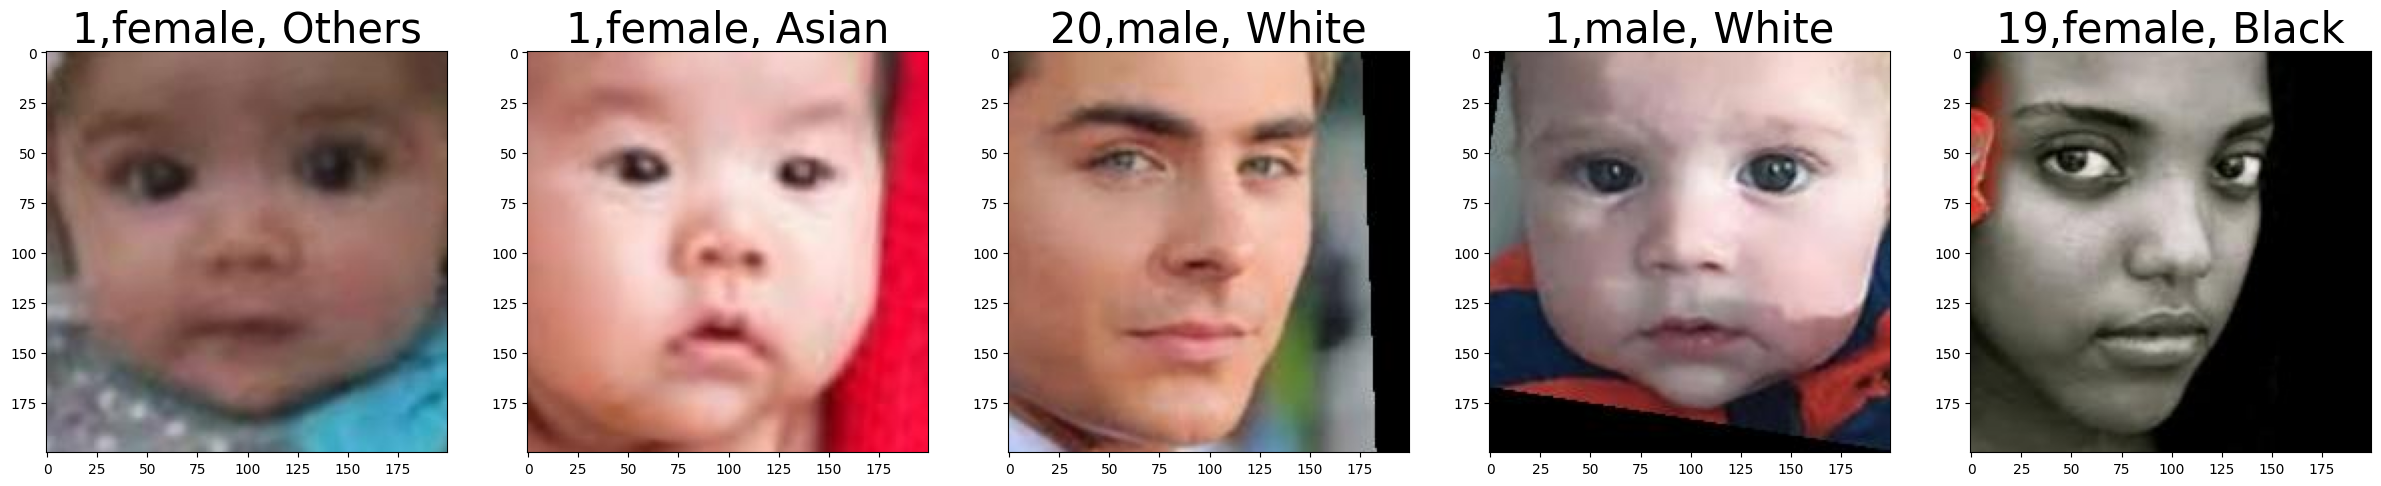

In [7]:
get_imgs()

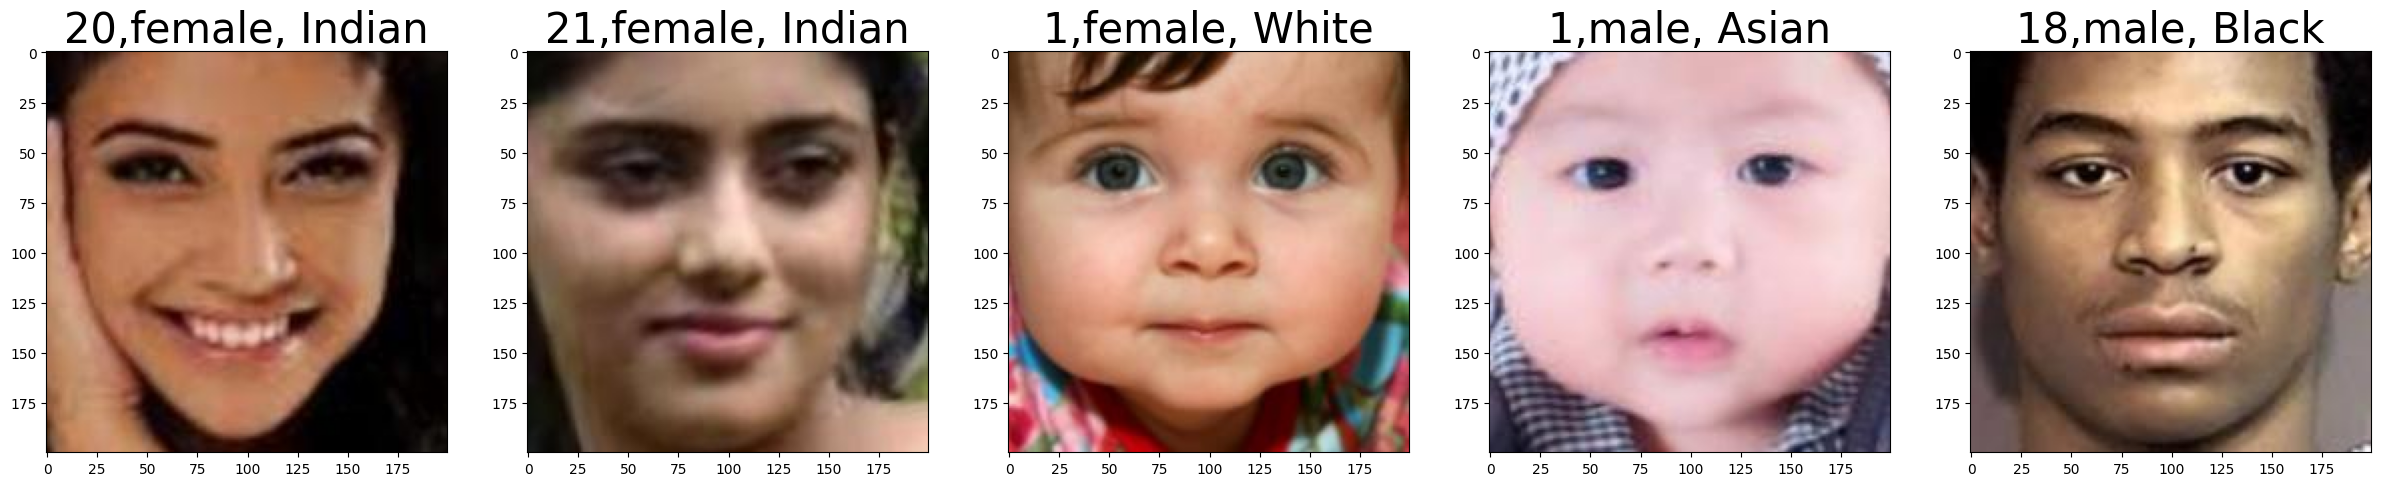

In [8]:
get_imgs()

### 동양인 데이터 확인

In [15]:
from glob import glob

data_path = './data/UTKFace'

image_names = glob(data_path+"/*.jpg")
image_names[:5]

['./data/UTKFace\\100_0_0_20170112213500903.jpg.chip.jpg',
 './data/UTKFace\\100_0_0_20170112215240346.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170110183726390.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170112213001988.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170112213303693.jpg.chip.jpg']

In [16]:
# 동양인 idx
orient_image_idx = []

for idx in range(len(image_names)):
    labels = image_names[idx].split("\\")[1].split(".")[0]
    labels = labels.split("_")
    if int(labels[2]) == 2:
        orient_image_idx.append(idx)
orient_image_idx[:5] , len(orient_image_idx)

([8, 9, 10, 12, 13], 3434)

In [22]:
def get_orient_imgs():
    from PIL import Image
    import numpy as np
    import random
    import matplotlib.pyplot as plt

    rand_idx = random.sample(orient_image_idx,5)
    
    plt.figure(figsize=(30,30))
    for i,idx in enumerate(rand_idx):

        img = Image.open(image_names[idx])
        img = np.array(img)

        # [age]_[gender]_[race]_[date&time].jpg
        labels = image_names[idx].split("\\")[1].split(".")[0]
        labels = labels.split("_")
        # print(labels)
        age = int(labels[0])
        gender = int(labels[1])
        race = int(labels[2])

        class_gender = ['male','female']
        class_race = ['White','Black', 'Asian', 'Indian','Others']

        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.title(str(age)+","+ str(class_gender[gender])+ ", " + str(class_race[race]),fontsize=30)

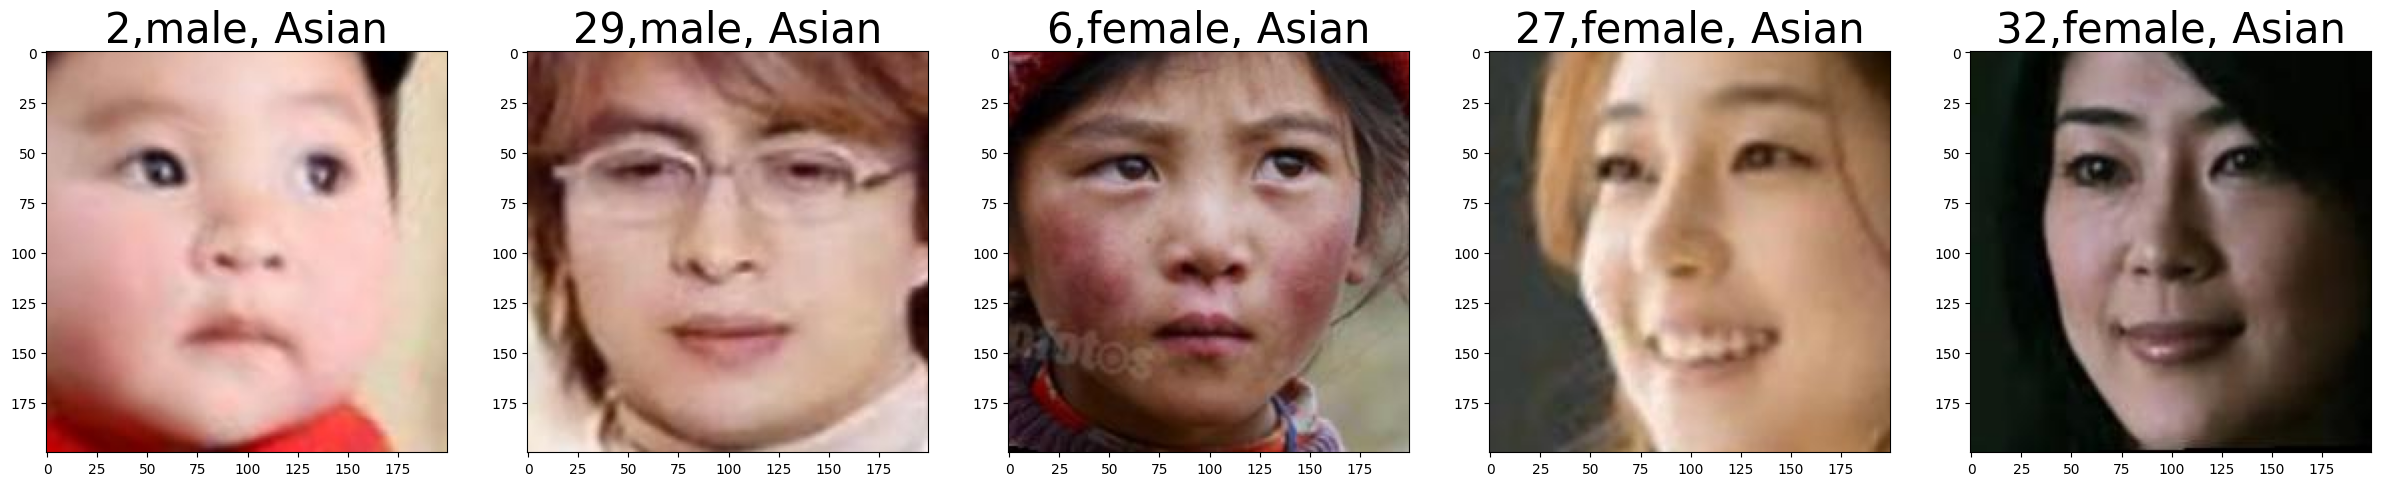

In [23]:
get_orient_imgs()

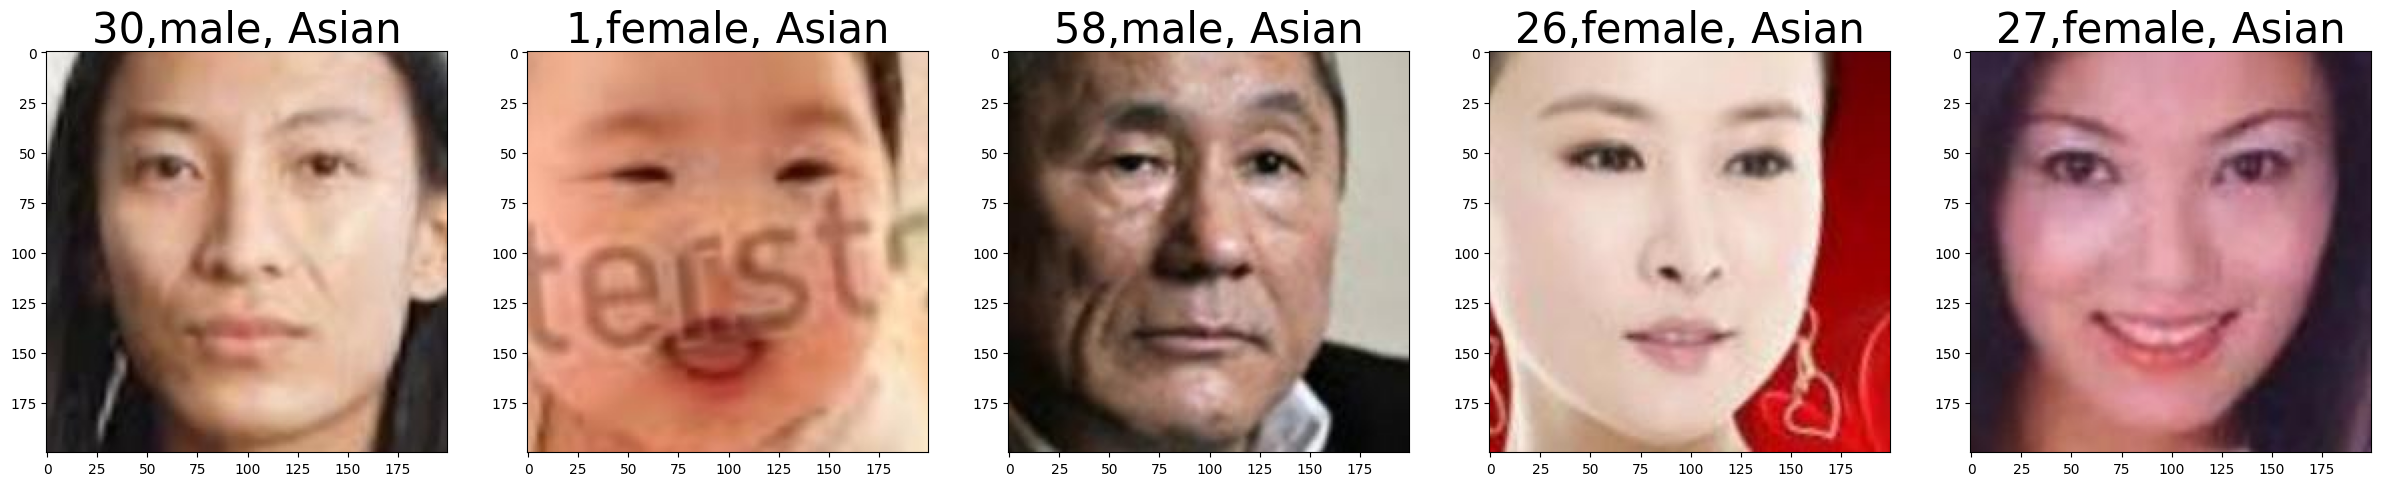

In [24]:
get_orient_imgs()

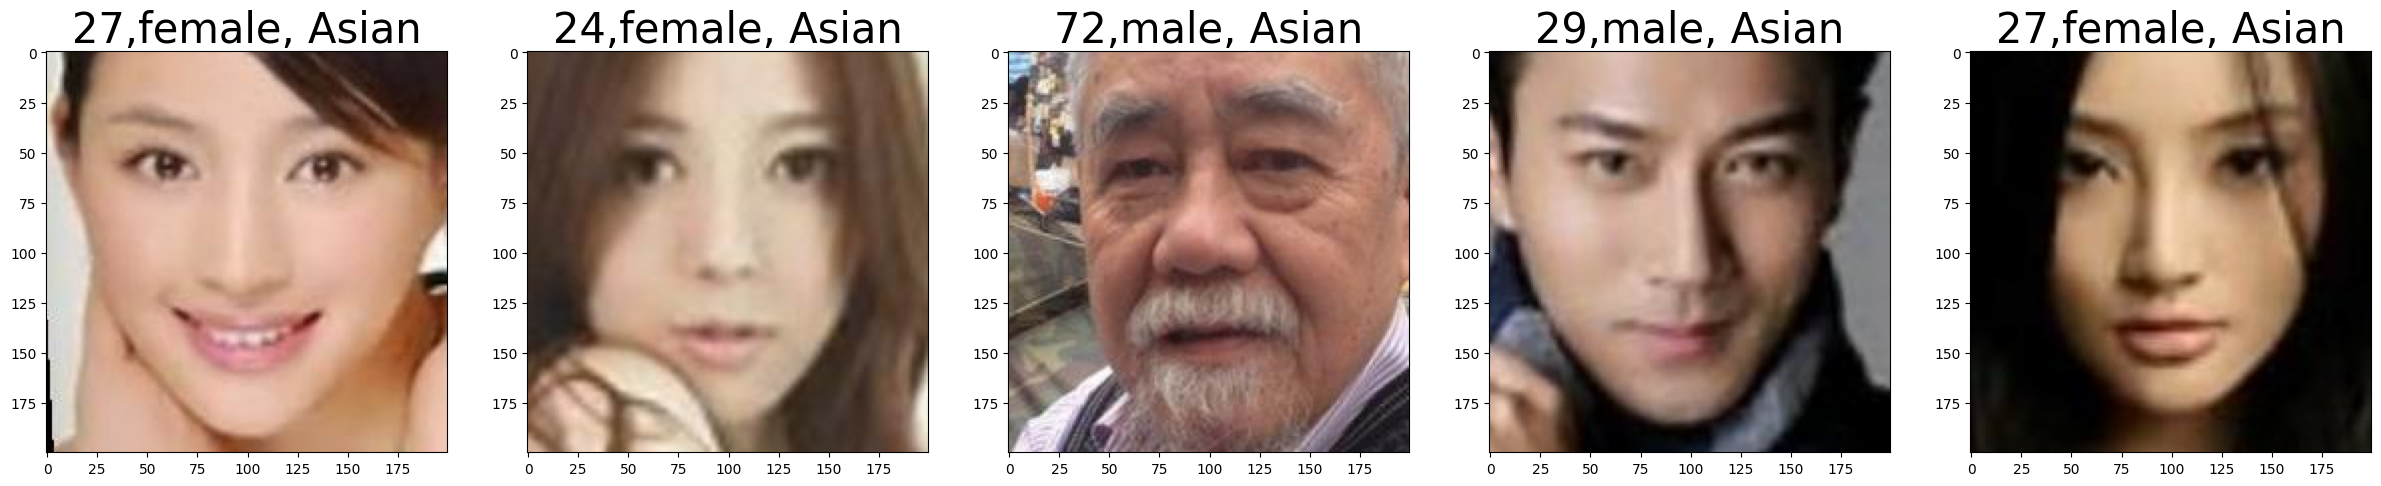

In [25]:
get_orient_imgs()

### 동양인 데이터 나이별 갯수 확인

In [28]:
# 동양인 age들
occident_image_ages = []

for idx in range(len(image_names)):
    labels = image_names[idx].split("\\")[1].split(".")[0]
    labels = labels.split("_")
    if int(labels[2]) == 2:
        occident_image_ages.append(int(labels[0]))
occident_image_ages[:5] , len(occident_image_ages) , max(occident_image_ages) , min(occident_image_ages)

([100, 100, 100, 101, 103], 3434, 116, 1)

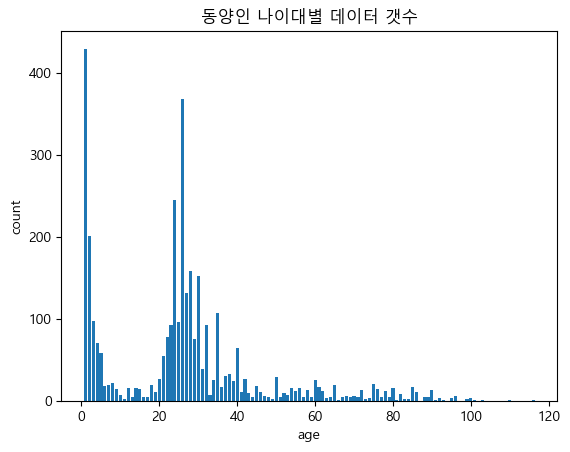

In [33]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

def visualize_list_elements_count(data_list):
    # 리스트의 각 요소의 갯수를 구합니다.
    element_counts = {}
    for item in data_list:
        if item in element_counts:
            element_counts[item] += 1
        else:
            element_counts[item] = 1

    # 요소의 갯수와 해당 요소를 추출합니다.
    elements, counts = zip(*element_counts.items())

    # 시각화를 위한 바 차트를 그립니다.
    plt.bar(elements, counts)
    plt.xlabel('age')
    plt.ylabel('count')
    plt.title('동양인 나이대별 데이터 갯수')
    plt.show()

# 리스트의 요소 갯수를 시각화합니다.
visualize_list_elements_count(occident_image_ages)

### 서양이 나이대별 갯수 확인

In [34]:
# 서양인 age들
occident_image_ages = []

for idx in range(len(image_names)):
    labels = image_names[idx].split("\\")[1].split(".")[0]
    labels = labels.split("_")
    if int(labels[2]) != 2:
        occident_image_ages.append(int(labels[0]))
occident_image_ages[:5] , len(occident_image_ages) , max(occident_image_ages) , min(occident_image_ages)

([100, 100, 100, 100, 100], 20274, 116, 1)

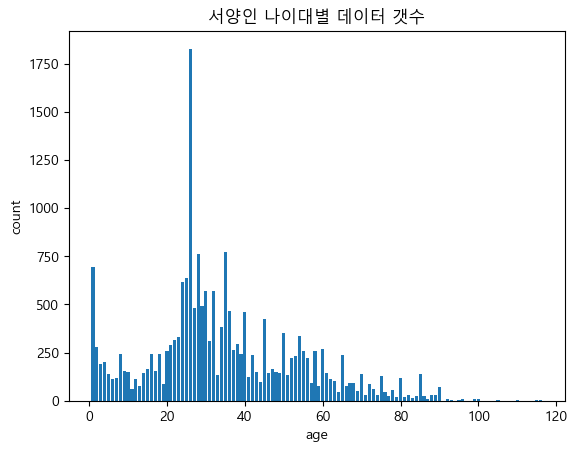

In [36]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

def visualize_list_elements_count(data_list):
    # 리스트의 각 요소의 갯수를 구합니다.
    element_counts = {}
    for item in data_list:
        if item in element_counts:
            element_counts[item] += 1
        else:
            element_counts[item] = 1

    # 요소의 갯수와 해당 요소를 추출합니다.
    elements, counts = zip(*element_counts.items())

    # 시각화를 위한 바 차트를 그립니다.
    plt.bar(elements, counts)
    plt.xlabel('age')
    plt.ylabel('count')
    plt.title('서양인 나이대별 데이터 갯수')
    plt.show()

# 리스트의 요소 갯수를 시각화합니다.
visualize_list_elements_count(occident_image_ages)

### 동영/서양 갯수 확인

In [9]:
from glob import glob

data_path = './data/UTKFace'

image_names = glob(data_path+"/*.jpg")
image_names[:5]

['./data/UTKFace\\100_0_0_20170112213500903.jpg.chip.jpg',
 './data/UTKFace\\100_0_0_20170112215240346.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170110183726390.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170112213001988.jpg.chip.jpg',
 './data/UTKFace\\100_1_0_20170112213303693.jpg.chip.jpg']

In [14]:
# orient : 동양
# occident : 서양
orient = 0
occident = 0

for idx in range(len(image_names)): 
    # [age]_[gender]_[race]_[date&time].jpg
    labels = image_names[idx].split("\\")[1].split(".")[0]
    labels = labels.split("_")
    if int(labels[2]) == 2:
        orient += 1
    else:
        occident += 1
orient, occident

(3434, 20274)